# Python Assignment for BCB546X- Spring 2021

Sushma Ambekar

### Importing all required packages for the assignment

In [1]:
## Setting the required environment for all future code
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC

import urllib.request

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline  
# Shows plots inline

### Downloading the data from the assignment repositoy

In [2]:
# download data to use in analysis

urllib.request.urlretrieve('https://raw.githubusercontent.com/sushma-ambekar/BCB546-PythonHW_Spring2021/master/bears_cytb.fasta',
                           'bears_cytb.fasta')
urllib.request.urlretrieve('https://raw.githubusercontent.com/sushma-ambekar/BCB546-PythonHW_Spring2021/master/bears_mass.csv',
                           'bears_mass.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/sushma-ambekar/BCB546-PythonHW_Spring2021/master/seqence_translate.py',
                           'seqence_translate.py')

## Citation: https://docs.python.org/3/library/urllib.request.html

('seqence_translate.py', <http.client.HTTPMessage at 0x7fefb35e2430>)

## Functions

### 1. Getting the sequences

In [3]:
## This function reads in a FASTA file and returns a dictionary of sequences by species name
def get_sequences_from_file(fasta_fn):  #Input: FASTA file in quotations 
    sequence_data_dict = {}   # Creates a dictonary,
    for record in SeqIO.parse(fasta_fn, "fasta"): # Parses out the species name from the input file, then uses the species name as the key for sequences
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq  
    return(sequence_data_dict) # The returned result is the dictonary, the sequence can be accessed by iterating through it. 

### 2. Sequence translation function

In [4]:
## This function converts a nucleotide sequence string to an amino acid string
def translate_function(string_nucleotides): #input is a consistent string of nucleotide sequence
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #returns a table of codons to amino acid symbol (http://biopython.org/DIST/docs/tutorial/Tutorial.html)
    string_aa = ""
    for i in range(0,len(string_nucleotides),4): # i starts at 0, iterates to next codon until end of nucleotide sequence
        codon = string_nucleotides[i:i+3] #creates a codon out of a 3 length nucleotide sequence
        if codon in ["TAA","TAG","AGA","AGG"]:  #check for stop codon
            return string_aa #quit function with sequence generated so far
        aa_seq_string=aa_seq_string+mito_table.forward_table[codon] #translates the codon using provided command by Dr. X and adds it to the current total sequence
    return(string_aa) #returns a string containing the translated amino acid sequence in aa symbols 

### 3. Alternative translation function

In [5]:
## This is an alternative way to convert a nucleotide sequence to an amino acid string
def better_translate(string_nucleotides): #input is a consistent string of nucleotide sequence
    better_string_aa = ""
    better_string_aa=Seq.translate(string_nucleotides, table=2, to_stop=True) #translates the nucleotide sequence into amino acids, stopping at a stop codon (http://biopython.org/DIST/docs/tutorial/Tutorial.html)
    return better_string_aa #returns a string containing the translated amino acid sequence in aa symbols 

### 4. Function to calculate molecular weight of AA string

In [6]:
## This function returns the molecular weight of an amino acid (aa) string
def compute_molecular_weight(aa_seq): #INPUT: string of an amino acid sequence, must be only amino acids
    analysed_seq = ProteinAnalysis(aa_seq) #checks if the argument is a pure amino acid sequence
    return analysed_seq.molecular_weight() #returns the molecular weight as a float
## Citation: http://biopython.org/wiki/ProtParam

### 5. GC% function

In [7]:
## This function returns the GC content of an amino acid string
def compute_GC_content(DNA_seq): #INPUT: string of an amino acid sequence, must be only amino acids
    return GC(DNA_seq) #returns the GC content as a float, percentage between 0 and 100
## Citation: http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html

### Main


In [8]:
## Read in the files and convert them to a dictionary
cytb_seqs = get_sequences_from_file('bears_cytb.fasta') 
bears_df = pd.read_csv('bears_mass.csv') # Create a dataframe of bear body mass and 
species_list = list(bears_df.species) # Create a new list of species names with it

### Checking the dataframes

In [9]:
cytb_seqs # Look at the sequences

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA'),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA'),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA'),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA'),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA'),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA'),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA')}

In [10]:
bears_df # Check the bears_df dataframe

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


In [11]:
species_list  # Check species_list dataframe

['Ursus spelaeus',
 'Ursus arctos',
 'Ursus thibetanus',
 'Melursus ursinus',
 'Ursus americanus',
 'Helarctos malayanus',
 'Ailuropoda melanoleuca',
 'Tremarctos ornatus',
 'Ursus maritimus']

In [12]:
## 6.
bears_molec_df = bears_df.copy()  #Create a copy of the original df to avoid tampering with raw data
for index, row in bears_molec_df.iterrows():   #Loop through the data frame, initializing a new column with value 'NAN'
    bears_molec_df.loc[index,'molecular_weight'] = "NaN"    #in each row
for index, row in bears_molec_df.iterrows():
    bears_molec_df.loc[index,'GC_content'] = "NaN"
bears_molec_df.head(5)  #Shows the current state of our copy

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN


In [13]:
bears_molec_df


,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


In [14]:
## 7. 
## For loop to iterate through each species represented by a row, compute statistics from cytb_seqs, 
## and write them to our previously made new columns

row = 0
for i in bears_molec_df.species:  #Gets you the names of the species in the bear df
    #Translates the sequence of the corresponding species in cytb and saves to new variable
    aa_sequence = better_translate(str(cytb_seqs[i]))
    #computes the molecular weight of the new aa sequence
    molec_weight = compute_molecular_weight(aa_sequence)
    #computes the GC content of the DNA sequence
    GC_sequence = compute_GC_content(str(cytb_seqs[i]))
    #Write the values to the new columns
    bears_molec_df.iloc[row, bears_molec_df.columns.get_loc('molecular_weight')] = molec_weight
    bears_molec_df.iloc[row, bears_molec_df.columns.get_loc('GC_content')] = GC_sequence
    row += 1
bears_molec_df.head(5)

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474


### Plotting

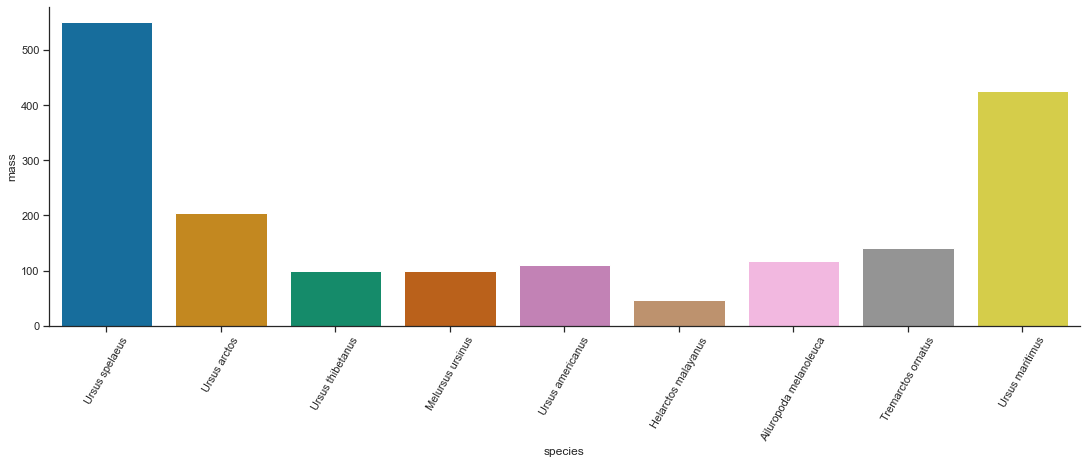

In [19]:
## 8. 
## A bar-chart plotted with seaborn of the mass with the x-axes labeled with species names.
plot_dims = (14, 9)
b = sns.catplot(data=bears_molec_df, x="species", y="mass", kind="bar", aspect=3, palette='colorblind')
b.set_xticklabels(rotation=60) #rotates the x axis labels 


### *Q1* What is the largest bear species? 
The Ursus spelaeus is the largest bear species

### *Q2* What else is interesting about this species?
Ursus spelaeus, also called the cave bear was mostly a vegetarian like me!

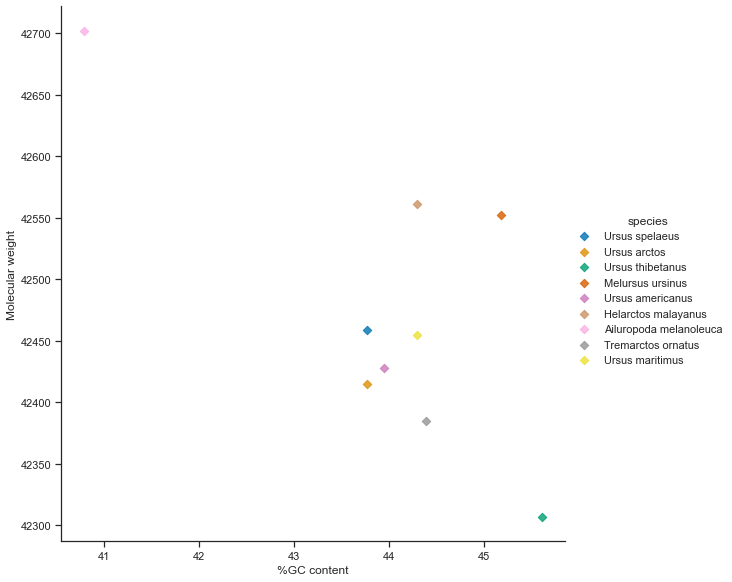

In [18]:
## 9.
## Plot with seaborn of the molecular weight (y-axis) as a function of GC-content (x-axis)
weight_GC = sns.lmplot(data=bears_molec_df, x="GC_content", y="molecular_weight", fit_reg=False, 
                       height=8, hue='species', markers='D', palette='colorblind')
weight_GC.set_axis_labels('%GC content', 'Molecular weight')